In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy.stats as stats
import xarray as xr
import ipdb
import glob
import itertools
import numpy.ma as ma
import pickle as pkl
import pandas as pd

from utils import constants as cnst

pylab.rcParams['figure.figsize'] = (50., 50.)
#%matplotlib inline

In [1]:
cd ..

/users/global/cornkle/pythonWorkspace/proj_CEH


In [3]:
def get_ERA5(era_pl, era_srfc, indic):
    
    dic = {}

    dic['q_col'] = []
    dic['u_col'] = []
    dic['r_col'] = []
    dic['v_col'] = []
    ### single values
    dic['tcwv'] = []
    dic['CAPE'] = []
    dic['dates'] = []
    dic['tmin'] = []
    dic['tmean'] = []
    dic['t10'] = []
    dic['area'] = []
    dic['area70'] = []
    dic['lat'] = []
    dic['lon'] = []
    dic['u925'] = []
    dic['u650'] = []
    dic['q925'] = []
    dic['q700'] = []
    
    for id, date in enumerate(indic.date):
        
        print('Doing', date)
        

#         getera_pl =np.where((era_pl['time.day']==(indic['date'])[id].day) & (era_pl['time.month']==indic.month[id]) 
#                             & (era_pl['time.year']==indic.year[id]) & (era_pl['time.hour']==12))
        
#         getera_sf =np.where((era_srfc['time.day']==(indic['date'])[id].day)  & (era_srfc['time.year']==indic.year[id]) 
#                             & (era_srfc['time.month']==indic.month[id]) & (era_srfc['time.hour']==12))

        time = str(date.year)+str(date.month).zfill(2)+str(date.day).zfill(2)+'T12'

        try:
            era_day_pl = era_pl.sel(time=time).isel(time=0)
        except (TypeError, IndexError, KeyError):
            print('Era missing:', date)
            for k in dic.keys():
                dic[k].append(np.nan)
            continue

        era_day_sf = era_srfc.sel(time=time).isel(time=0)

        elat = indic.clat[id]
        elon = indic.clon[id]
        dic['dates'].append(date)
        dic['lat'].append(elat)
        dic['lon'].append(elon)
        
        point = era_day_sf.sel(latitude=elat, longitude=elon, method='nearest')
        
        posx = int(np.where(era_day_sf.longitude == point.longitude)[0])
        posy = int(np.where(era_day_sf.latitude == point.latitude)[0])

        dic['u925'].append(np.asscalar((era_day_pl['u'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).sel(level=925).mean().values)))
        dic['u650'].append(np.asscalar((era_day_pl['u'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).sel( level=650).mean().values)))
        dic['q925'].append(np.asscalar((era_day_pl['q'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).sel( level=925).mean().values)))
        dic['q700'].append(np.asscalar((era_day_pl['q'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).sel( level=700).mean().values)))
        dic['CAPE'].append(np.asscalar((era_day_sf['cape'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean().values)))
        dic['tcwv'].append(np.asscalar((era_day_sf['tcwv'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean().values)))
                          
        dic['q_col'].append((era_day_pl['q'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean(['latitude', 'longitude']).values))
        dic['u_col'].append((era_day_pl['u'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean(['latitude', 'longitude']).values))
        dic['r_col'].append((era_day_pl['r'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean(['latitude', 'longitude']).values))
        dic['v_col'].append((era_day_pl['v'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean(['latitude', 'longitude']).values))
        
        dic['tmin'].append(indic.tmin[id])
        dic['tmean'].append(indic.tmean[id])
        dic['t10'].append(indic.t10[id])
        dic['area'].append(indic.area[id])
        dic['area70'].append((indic['70area'])[id])
    dic['level'] = era_pl.level.values
    
    return dic

In [4]:
def get_ERA5_clim(era_pl_clim, era_srfc_clim, indic):
    
    dic = {}

    dic['q_col'] = []
    dic['u_col'] = []
    dic['r_col'] = []
    dic['v_col'] = []
    ### single values
    dic['tcwv'] = []
    dic['CAPE'] = []
    dic['dates'] = []
    dic['tmin'] = []
    dic['tmean'] = []
    dic['t10'] = []
    dic['area'] = []
    dic['area70'] = []
    dic['lat'] = []
    dic['lon'] = []
    dic['u925'] = []
    dic['u650'] = []
    dic['q925'] = []
    dic['q700'] = []
    
    for id, date in enumerate(indic.date):
        
        print('Doing', date)


        time = str(date.year)+'-'+str(date.month)+'-'+'12'

        try:
            era_day_pl = era_pl_clim.sel(ymonth=time)
        except (TypeError, IndexError, KeyError):
            print('Era missing:', date)
            for k in dic.keys():
                dic[k].append(np.nan)
            continue

        era_day_sf = era_srfc_clim.sel(ymonth=time)

        elat = indic.clat[id]
        elon = indic.clon[id]
        dic['dates'].append(date)
        dic['lat'].append(elat)
        dic['lon'].append(elon)
        
        point = era_day_sf.sel(latitude=elat, longitude=elon, method='nearest')
        
        posx = int(np.where(era_day_sf.longitude == point.longitude)[0])
        posy = int(np.where(era_day_sf.latitude == point.latitude)[0])

        dic['u925'].append(np.asscalar((era_day_pl['u'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).sel(level=925).mean().values)))
        dic['u650'].append(np.asscalar((era_day_pl['u'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).sel( level=650).mean().values)))
        dic['q925'].append(np.asscalar((era_day_pl['q'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).sel( level=925).mean().values)))
        dic['q700'].append(np.asscalar((era_day_pl['q'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).sel( level=700).mean().values)))
        dic['CAPE'].append(np.asscalar((era_day_sf['cape'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean().values)))
        dic['tcwv'].append(np.asscalar((era_day_sf['tcwv'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean().values)))
                          
        dic['q_col'].append((era_day_pl['q'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean(['latitude', 'longitude']).values))
        dic['u_col'].append((era_day_pl['u'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean(['latitude', 'longitude']).values))
        dic['r_col'].append((era_day_pl['r'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean(['latitude', 'longitude']).values))
        dic['v_col'].append((era_day_pl['v'].isel(latitude=slice(posy-3,posy+3), longitude=slice(posx-3,posx+3)).mean(['latitude', 'longitude']).values))
        
        dic['tmin'].append(indic.tmin[id])
        dic['tmean'].append(indic.tmean[id])
        dic['t10'].append(indic.t10[id])
        dic['area'].append(indic.area[id])
        dic['area70'].append((indic['70area'])[id])
    dic['level'] = era_pl_clim.level.values
    
    return dic

In [5]:
pdf = pkl.load(open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA.p', 'rb'))

In [6]:
pdf_march = pdf.where((pdf.clat>=4.5) & (pdf.clat<=8.5) & (pdf.clon>=-12) & (pdf.clon<=12) &
(pdf.month == 3) & (pdf.year >=2000) & (pdf.year <=2012))
pdf_march = pdf_march.dropna()

In [7]:
pdf_oct = pdf.where((pdf.clat>=4.5) & (pdf.clat<=8.5) & (pdf.clon>=-12) & (pdf.clon<=12) &
(pdf.month == 10) & (pdf.year >=2000) & (pdf.year <=2012))
pdf_oct = pdf_oct.dropna()

In [24]:
era_pl = xr.open_mfdataset('/home/ck/DIR/mymachine/ERA5/pressure_levels/*.nc')
era_srfc = xr.open_mfdataset('/home/ck/DIR/mymachine/ERA5/surface/*.nc')

In [25]:
era_pl['ymonth'] = ('time', [str(y)+'-'+str(m)+'-'+str(h) for (y,m,h) in zip(era_pl['time.year'].values,era_pl['time.month'].values,era_pl['time.hour'].values)])
grouped='ymonth'
era_pl_mean =  era_pl.groupby(grouped).mean(dim='time')

In [26]:
era_srfc['ymonth'] = ('time', [str(y)+'-'+str(m)+'-'+str(h) for (y,m,h) in zip(era_srfc['time.year'].values,era_srfc['time.month'].values,era_srfc['time.hour'].values)])
grouped='ymonth'
era_srfc_mean =  era_srfc.groupby(grouped).mean(dim='time')

In [9]:
era_pl_box = era_pl.sel(latitude=slice(7.5,4.5), longitude=slice(-12,12))

In [52]:
q_clim_march = era_pl_box['q'][(era_pl_box['time.hour']==12)&(era_pl_box['time.month']==3)].mean(['latitude', 'longitude','time'])
u_clim_march = era_pl_box['u'][(era_pl_box['time.hour']==12)&(era_pl_box['time.month']==3)].mean(['latitude', 'longitude','time'])
v_clim_march = era_pl_box['v'][(era_pl_box['time.hour']==12)&(era_pl_box['time.month']==3)].mean(['latitude', 'longitude','time'])

In [53]:
q_clim_oct = era_pl_box['q'][(era_pl_box['time.hour']==12)&(era_pl_box['time.month']==10)].mean(['latitude', 'longitude','time'])
u_clim_oct = era_pl_box['u'][(era_pl_box['time.hour']==12)&(era_pl_box['time.month']==10)].mean(['latitude', 'longitude','time'])
v_clim_oct = era_pl_box['v'][(era_pl_box['time.hour']==12)&(era_pl_box['time.month']==10)].mean(['latitude', 'longitude','time'])

In [12]:
q_clim_oct.values

array([5.69420990e-05, 1.83720607e-04, 3.95964831e-04, 7.16251554e-04,
       1.18527003e-03, 1.93428551e-03, 3.03512090e-03, 4.22707573e-03,
       5.09281689e-03, 5.88065572e-03, 7.07634445e-03, 8.71986430e-03,
       1.17519861e-02, 1.27799865e-02, 1.37435822e-02, 1.45613989e-02,
       1.52245937e-02, 1.58360358e-02, 1.65317673e-02], dtype=float32)

In [15]:
# era_out = get_ERA5(era_pl, era_srfc, pdf_march)
# pkl.dump(era_out,open(cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_march.p', 'wb'))

In [ ]:
era_clim_out = get_ERA5_clim(era_pl_mean, era_srfc_mean, pdf_march)
pkl.dump(era_clim_out,open(cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_march_clim.p', 'wb'))

Doing 2000-03-01 18:00:00
Doing 2000-03-02 18:00:00
Doing 2000-03-04 18:00:00
Doing 2000-03-05 18:00:00
Doing 2000-03-05 18:00:00
Doing 2000-03-05 18:00:00
Doing 2000-03-05 18:00:00
Doing 2000-03-06 18:00:00
Doing 2000-03-06 18:00:00
Doing 2000-03-06 18:00:00
Doing 2000-03-06 18:00:00
Doing 2000-03-06 18:00:00
Doing 2000-03-07 18:00:00
Doing 2000-03-08 18:00:00
Doing 2000-03-08 18:00:00
Doing 2000-03-09 18:00:00
Doing 2000-03-11 18:00:00
Doing 2000-03-12 18:00:00
Doing 2000-03-14 18:00:00
Doing 2000-03-14 18:00:00
Doing 2000-03-15 18:00:00
Doing 2000-03-15 18:00:00
Doing 2000-03-15 18:00:00
Doing 2000-03-15 18:00:00
Doing 2000-03-16 18:00:00
Doing 2000-03-16 18:00:00
Doing 2000-03-16 18:00:00
Doing 2000-03-16 18:00:00
Doing 2000-03-16 18:00:00
Doing 2000-03-16 18:00:00
Doing 2000-03-17 18:00:00
Doing 2000-03-17 18:00:00
Doing 2000-03-17 18:00:00
Doing 2000-03-17 18:00:00
Doing 2000-03-17 18:00:00
Doing 2000-03-17 18:00:00
Doing 2000-03-18 18:00:00
Doing 2000-03-18 18:00:00
Doing 2000-0

Doing 2002-03-07 18:00:00
Doing 2002-03-07 18:00:00
Doing 2002-03-07 18:00:00
Doing 2002-03-07 18:00:00
Doing 2002-03-07 18:00:00
Doing 2002-03-08 18:00:00
Doing 2002-03-08 18:00:00
Doing 2002-03-08 18:00:00
Doing 2002-03-08 18:00:00
Doing 2002-03-08 18:00:00
Doing 2002-03-08 18:00:00
Doing 2002-03-09 18:00:00
Doing 2002-03-09 18:00:00
Doing 2002-03-09 18:00:00
Doing 2002-03-09 18:00:00
Doing 2002-03-09 18:00:00
Doing 2002-03-10 18:00:00
Doing 2002-03-10 18:00:00
Doing 2002-03-10 18:00:00
Doing 2002-03-10 18:00:00
Doing 2002-03-10 18:00:00
Doing 2002-03-11 18:00:00
Doing 2002-03-11 18:00:00
Doing 2002-03-11 18:00:00
Doing 2002-03-12 18:00:00
Doing 2002-03-12 18:00:00
Doing 2002-03-12 18:00:00
Doing 2002-03-13 18:00:00
Doing 2002-03-13 18:00:00
Doing 2002-03-13 18:00:00
Doing 2002-03-13 18:00:00
Doing 2002-03-15 18:00:00
Doing 2002-03-15 18:00:00
Doing 2002-03-15 18:00:00
Doing 2002-03-15 18:00:00
Doing 2002-03-15 18:00:00
Doing 2002-03-15 18:00:00
Doing 2002-03-15 18:00:00
Doing 2002-0

In [19]:
era_march = pkl.load( open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_march.p', 'rb'))
era_oct = pkl.load( open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_oct.p', 'rb'))

In [20]:
era_march_clim = pkl.load( open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_march_clim.p', 'rb'))
era_oct_clim = pkl.load( open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_oct_clim.p', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: '/home/ck/DIR/cornkle//data/CLOVER/saves/StormLoc_-50_5000km_WA_ERA5_march_clim.p'

In [15]:
level = era_march.pop('level')
level = era_oct.pop('level')

In [16]:
for k in era_march.keys():
    era_march[k] = era_march[k][0:1841]

In [17]:
for k in era_oct.keys():
    era_oct[k] = era_oct[k][0:2096]

In [18]:
np.array(era_oct['CAPE']).mean()

1063.4757279858334

In [19]:
np.array(era_march['CAPE']).mean()

1237.0779014713798

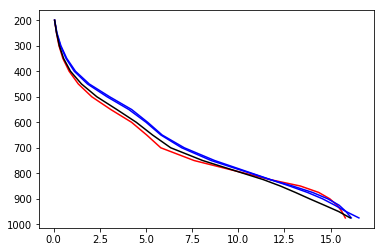

In [20]:
q_march = np.array(era_march['q_col']).mean(axis=0)
q_oct = np.array(era_oct['q_col']).mean(axis=0)
plt.plot(q_march*1000, era_pl.level.values,'r')
plt.plot(q_oct*1000,era_pl.level.values, 'b')
plt.plot(q_clim_oct*1000,era_pl.level.values, 'b-')
plt.plot(q_clim_march*1000,era_pl.level.values, 'k-')
plt.gca().invert_yaxis()

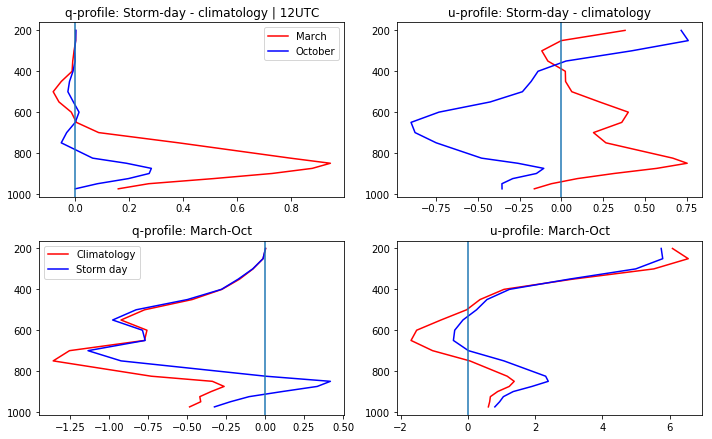

In [54]:
q_march = np.array(era_march['q_col']).mean(axis=0)*1000 - q_clim_march*1000 
q_oct = np.array(era_oct['q_col']).mean(axis=0)*1000 - q_clim_oct*1000 
f = plt.figure(figsize=(10,9))
f.add_subplot(321)
plt.plot(q_march, era_pl.level.values,'r', label='March')
plt.plot(q_oct, era_pl.level.values,'b', label='October')
plt.axvline(x=0)
plt.gca().invert_yaxis()
plt.title('q-profile: Storm-day - climatology | 12UTC')
plt.legend()

q_march = np.array(era_march['u_col']).mean(axis=0) - u_clim_march
q_oct = np.array(era_oct['u_col']).mean(axis=0) - u_clim_oct
f.add_subplot(322)
plt.plot(q_march, era_pl.level.values,'r', label='March')
plt.plot(q_oct, era_pl.level.values,'b', label='October')
plt.axvline(x=0)
plt.gca().invert_yaxis()
plt.title('u-profile: Storm-day - climatology')


q_march = q_clim_march*1000 - q_clim_oct*1000
q_oct = np.array(era_march['q_col']).mean(axis=0)*1000 - np.array(era_oct['q_col']).mean(axis=0)*1000
f.add_subplot(323)
plt.plot(q_march, era_pl.level.values,'r', label='Climatology')
plt.plot(q_oct, era_pl.level.values,'b', label='Storm day')
plt.axvline(x=0)
plt.gca().invert_yaxis()
plt.title('q-profile: March-Oct')
plt.legend()

q_march = u_clim_march - u_clim_oct
q_oct = np.array(era_march['u_col']).mean(axis=0) - np.array(era_oct['u_col']).mean(axis=0)
f.add_subplot(324)
plt.plot(q_march, era_pl.level.values,'r', label='Climatology')
plt.plot(q_oct, era_pl.level.values,'b', label='Storm day')
plt.axvline(x=0)
plt.gca().invert_yaxis()
plt.title('u-profile: March-Oct')

plt.tight_layout()

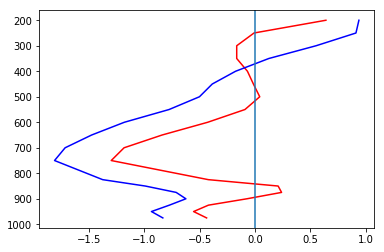

In [22]:
q_march = np.array(era_march['u_col']).mean(axis=0) - u_clim_march 
q_oct = np.array(era_oct['u_col']).mean(axis=0) - u_clim_oct 
plt.plot(q_march, era_pl.level.values,'r')
plt.plot(q_oct, era_pl.level.values,'b')
plt.axvline(x=0)
plt.gca().invert_yaxis()

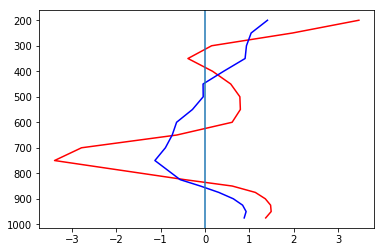

In [23]:
q_march = np.array(era_march['v_col']).mean(axis=0)- q_clim_march
q_oct = np.array(era_oct['v_col']).mean(axis=0)- q_clim_oct
plt.plot(q_march, era_pl.level.values,'r')
plt.plot(q_oct, era_pl.level.values,'b')
plt.axvline(x=0)
plt.gca().invert_yaxis()

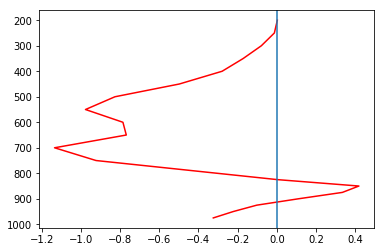

In [24]:
q_march = np.array(era_march['q_col']).mean(axis=0)*1000 - np.array(era_oct['q_col']).mean(axis=0)*1000
plt.plot(q_march, era_pl.level.values,'r')
plt.axvline(x=0)
plt.gca().invert_yaxis()

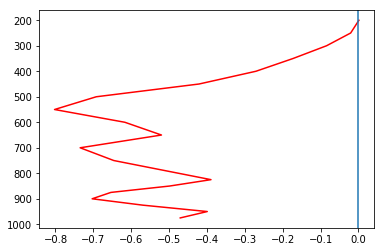

In [25]:
q_march = q_clim_march*1000 - q_clim_oct*1000
plt.plot(q_march, era_pl.level.values,'r')
plt.axvline(x=0)
plt.gca().invert_yaxis()

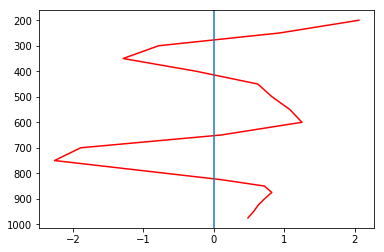

In [238]:
q_march = np.array(era_march['v_col']).mean(axis=0) - np.array(era_oct['v_col']).mean(axis=0)
plt.plot(q_march, era_pl.level.values,'r')
plt.axvline(x=0)
plt.gca().invert_yaxis()

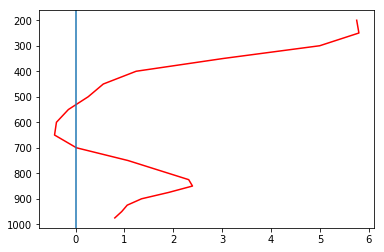

In [239]:
q_march = np.array(era_march['u_col']).mean(axis=0) - np.array(era_oct['u_col']).mean(axis=0)
plt.plot(q_march, era_pl.level.values,'r')
plt.axvline(x=0)
plt.gca().invert_yaxis()

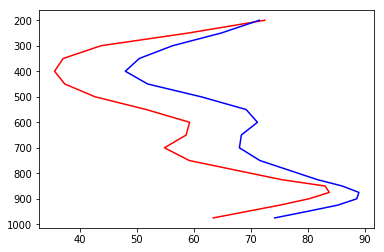

In [226]:
q_march = np.array(era_march['r_col']).mean(axis=0)
q_oct = np.array(era_oct['r_col']).mean(axis=0)
plt.plot(q_march, era_pl.level.values,'r')
plt.plot(q_oct,era_pl.level.values, 'b')
plt.gca().invert_yaxis()

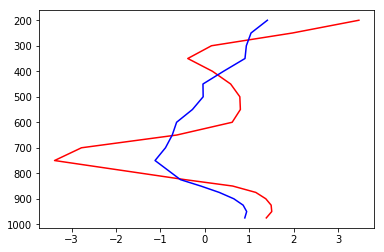

In [227]:
q_march = np.array(era_march['v_col']).mean(axis=0)
q_oct = np.array(era_oct['v_col']).mean(axis=0)
plt.plot(q_march, era_pl.level.values,'r')
plt.plot(q_oct,era_pl.level.values, 'b')
plt.gca().invert_yaxis()